In [113]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import torch

data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [114]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [115]:
Y_train

array([0, 5, 9, ..., 0, 0, 2])

In [116]:
X_train #each vertical line is a image

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [117]:
X_train_tensor = torch.from_numpy(X_train)
X_train_tensor.requires_grad = False
X_train_tensor

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)

In [118]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    W1 = torch.from_numpy(W1)
    W1.requires_grad = True
    b1 = np.random.rand(10, 1) - 0.5
    b1 = torch.from_numpy(b1)
    b1.requires_grad = True
    W2 = np.random.rand(10, 10) - 0.5
    W2 = torch.from_numpy(W2)
    W2.requires_grad = True
    b2 = np.random.rand(10, 1) - 0.5
    b2 = torch.from_numpy(b2)
    b2.requires_grad = True
    return W1, b1, W2, b2

def Activation(input_tensor):
    return torch.relu(input_tensor)

# def Activasion(input_tensor):
#     # Create a boolean mask where elements are True if the value is positive or zero
#     positive_mask = input_tensor >= 0

#     # Use the boolean mask to set negative values to 0
#     output_tensor = input_tensor * positive_mask

#     return output_tensor

def softmax(X):
    # Calculate the exponential of each element in X
    exponential_X = torch.exp(X)

    # Compute the sum of exponential elements in each column
    sum_exponential_per_column = torch.sum(exponential_X, dim=0)

    # Use broadcasting to divide each element in exponential_X by the corresponding sum
    Y = exponential_X / sum_exponential_per_column
    return Y
# def softmax(X):
#     # Calculate the exponential of each element in X
#     exponential_X = X

#     # Compute the sum of exponential elements in each column
#     sum_exponential_per_column = torch.sum(exponential_X, dim=0)

#     # Use broadcasting to divide each element in exponential_X by the corresponding sum
#     Y = exponential_X / sum_exponential_per_column
#     return Y

def forward_prop(W1, b1, W2, b2, A0):
    Z1 = torch.matmul(W1, A0) + b1
    A1 = Activasion(Z1)
    Z2 = torch.matmul(W2, A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    # Get the length of the previous array
    length = len(Y)

    # Create a tensor with 10 rows and 'length' columns, initialized with zeros
    tensor_array = torch.zeros(10, length)

    # Change 1 value in each column to 1 based on the index given in prev_array
    for col_idx, row_idx in enumerate(Y):
        tensor_array[row_idx, col_idx] = 1

    return tensor_array

# def update_params(W1, b1, W2, b2, alpha):
#     W1.data -= alpha * W1.grad
#     b1.data -= alpha * b1.grad   
#     W2.data -= alpha * W2.grad
#     b2.data -= alpha * b2.grad
#     W1.grad = None
#     b1.grad = None
#     W2.grad = None
#     b2.grad = None
#     return W1, b1, W2, b2

def update_params(W1, b1, W2, b2, alpha):
    W1.data = W1 - alpha * W1.grad
    b1.data = b1 - alpha * b1.grad   
    W2.data = W2 - alpha * W2.grad
    b2.data = b2 - alpha * b2.grad
    W1.grad = None
    b1.grad = None
    W2.grad = None
    b2.grad = None
    W1.detach()
    b1.detach()
    W2.detach()
    b2.detach()
    return W1, b1, W2, b2


In [119]:
# W1, b1, W2, b2 = init_params()
# A0 = X_train_tensor
# Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, A0)
# A2
# dZ2 = A2 - one_hot(Y_train)
# Z2.backward(dZ2)
# print(W1.grad[5,300])
# print(W1[5,300])
# update_params(W1, b1, W2, b2, 0.1)
# print(W1[5,300])

In [120]:
def get_predictions(A2):
    _, predictions = torch.max(A2, dim=0)
    return predictions

def get_accuracy(predictions, Y):
    # Convert predictions and Y to PyTorch tensors if they are not already
    predictions = torch.tensor(predictions) if not isinstance(predictions, torch.Tensor) else predictions
    Y = torch.tensor(Y) if not isinstance(Y, torch.Tensor) else Y

    # Compare the elements in predictions with Y and count the number of correct predictions
    num_correct = torch.sum(predictions == Y).item()

    # Calculate accuracy
    accuracy = num_correct / Y.size(0)

    return accuracy

def gradient_descent(X, Y, alpha, iterations):
    one_hot_Y = one_hot(Y)
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
        dZ2 = A2 - one_hot_Y
#         print(W1[5,300], "W1 before backward")
        Z2.backward(dZ2)
        if(i%10==0):
            print(W1.grad[6,300], "W1.grad after backward")
#         update_params(W1, b1, W2, b2, alpha)
#         print(W1.grad[5,300], "W1.grad after backward")
#         print(W1[5,300], "W1 after backward")
        update_params(W1, b1, W2, b2, alpha)
#         break
#         print(W1[5,300], "W1 after update")
    return W1, b1, W2, b2

In [121]:
W1, b1, W2, b2 = gradient_descent(X_train_tensor, Y_train, 0.00001, 500)

Iteration:  0
0.14702439024390243
tensor(2124.4320, dtype=torch.float64) W1.grad after backward
Iteration:  10
0.28153658536585363
tensor(36.7235, dtype=torch.float64) W1.grad after backward
Iteration:  20
0.3894146341463415
tensor(24.2289, dtype=torch.float64) W1.grad after backward
Iteration:  30
0.4672926829268293
tensor(23.7119, dtype=torch.float64) W1.grad after backward
Iteration:  40
0.5461707317073171
tensor(27.7124, dtype=torch.float64) W1.grad after backward
Iteration:  50
0.6140975609756097
tensor(33.1770, dtype=torch.float64) W1.grad after backward
Iteration:  60
0.6304146341463415
tensor(27.8537, dtype=torch.float64) W1.grad after backward
Iteration:  70
0.6680487804878049
tensor(-9.6386, dtype=torch.float64) W1.grad after backward
Iteration:  80
0.7076585365853658
tensor(-11.5385, dtype=torch.float64) W1.grad after backward
Iteration:  90
0.7363170731707317
tensor(12.9349, dtype=torch.float64) W1.grad after backward
Iteration:  100
0.759
tensor(33.4560, dtype=torch.float6

In [124]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    current_image_tensor = torch.from_numpy(current_image)
    current_image_tensor.requires_grad = False
    prediction = make_predictions(torch.from_numpy(X_train[:, index, None]), W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  tensor([0])
Label:  0


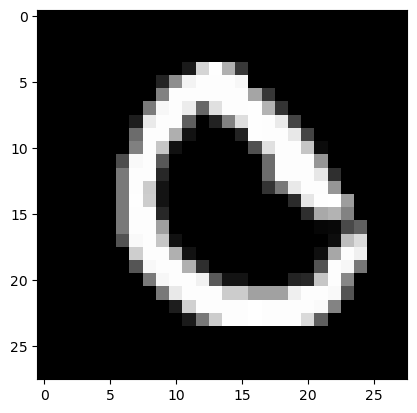

Prediction:  tensor([5])
Label:  5


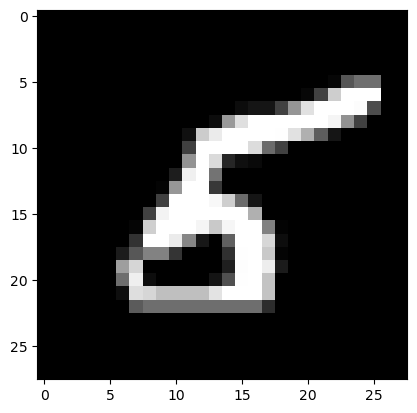

Prediction:  tensor([9])
Label:  9


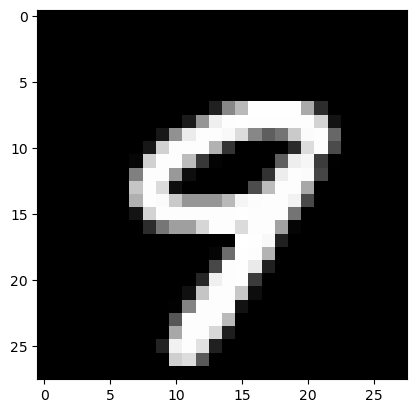

Prediction:  tensor([8])
Label:  8


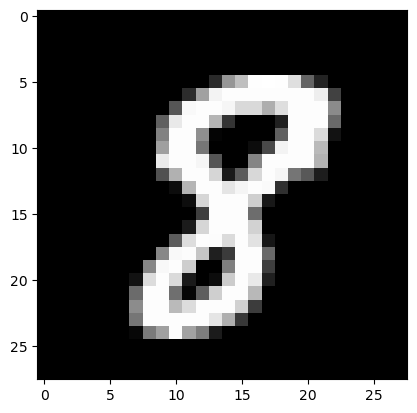

In [125]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)